# Importing Libraries

# **DO NOT CHANGE CODE**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Sets\random_imputed_2.csv",index_col=[0])
df1.sample(5)

,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,...,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,total.hemoglobin
inpatient.number,,,,,,,,,,,,,,,,,,,,,
747390,36.3,60,19,110,65,80.000000,19.396188,0,3,2,...,3.260225,4.392727,102.392821,144.935144,4.504688,0.836519,95.899174,99.666103,96.257815,166.131909
796434,36.0,78,22,150,90,110.000000,27.887617,0,4,2,...,4.069460,4.271185,105.811581,139.983979,4.665689,0.713342,96.103056,107.654319,95.096202,153.087879
791903,36.9,80,20,120,64,82.666667,22.939751,2,3,1,...,4.600000,3.010000,105.000000,136.000000,7.700000,0.200000,95.000000,80.000000,95.000000,110.000000
815969,36.0,72,20,122,62,82.000000,24.128792,2,3,3,...,1.053034,3.806500,107.171713,138.070886,4.467711,0.696972,94.208901,95.753058,95.906214,145.536099
799667,36.2,62,19,140,65,90.000000,18.365473,2,4,3,...,3.800080,4.106059,105.318805,144.871666,4.132503,0.407271,96.876978,94.513765,95.660930,156.825501


In [6]:
df3=pd.read_csv(r"C:\Users\vinayak\minor_proj\collabRV\collabRV\Z_Current\Sets\drug_onehot_latest.csv",index_col=[0])
df3.head()


,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
inpatient.number,,,,,,,,,,,,,,,,,,
722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [243]:
q="Atorvastatin calcium tablet"
r="Dobutamine hydrochloride injection"
s="Digoxin tablet"

In [244]:
#df1.drop(['hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase','hydroxybutyrate.dehydrogenase','free.calcium','anion.gap','lactate.dehydrogenase','lactate','CCI.score','consciousness','eye.opening','verbal.response','respiratory.support.','gender','ageCat'],axis=1,inplace=True)

In [245]:
df2=df3[q]

In [246]:
df=pd.concat([df1,df2],axis=1)



In [247]:
cols_to_scale = [df.columns]

scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(df)

In [248]:
df = pd.DataFrame(scaled_df,columns = df.columns)

In [249]:
df

,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,...,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,total.hemoglobin,Atorvastatin calcium tablet
0,0.271429,0.333333,0.500000,0.480159,0.383562,0.428309,0.046006,1.0,1.0,0.000000,...,0.462255,0.672512,0.747306,0.137840,0.140986,0.950984,0.316472,0.941277,0.686463,0.0
1,0.142857,0.363636,0.583333,0.595238,0.547945,0.569853,0.053564,1.0,1.0,0.000000,...,0.412078,0.750000,0.777215,0.085784,0.132075,0.880000,0.187234,0.878342,0.226190,1.0
2,0.200000,0.353535,0.555556,0.476190,0.547945,0.514706,0.076992,1.0,0.5,0.333333,...,0.365897,0.625000,0.678481,0.125000,0.000000,0.973333,0.365957,0.981283,0.410714,1.0
3,0.242857,0.651515,0.611111,0.484127,0.589041,0.540441,0.049828,1.0,0.5,0.666667,...,0.427526,0.652866,0.735337,0.113675,0.090877,0.934069,0.282782,0.957616,0.739584,0.0
4,0.271429,0.505051,0.555556,0.376984,0.445205,0.413603,0.054523,1.0,0.5,0.000000,...,0.418081,0.622484,0.904769,0.119964,0.094730,0.962117,0.326331,0.954084,0.605290,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.285714,0.464646,0.527778,0.634921,0.547945,0.588235,0.043996,0.0,1.0,0.333333,...,0.357016,0.625000,0.635443,0.313725,0.056604,0.986667,0.561702,0.987968,0.321429,0.0
1999,0.142857,0.303030,0.833333,0.678571,0.801370,0.744485,0.067515,1.0,0.5,0.333333,...,0.477119,0.627054,0.854731,0.125463,0.145465,0.940403,0.268889,0.958077,0.600442,0.0
2000,0.214286,0.494949,0.527778,0.674603,0.445205,0.551471,0.060653,1.0,0.5,0.333333,...,0.390764,0.729167,0.769620,0.198529,0.188679,0.560000,0.080851,0.557487,0.398810,1.0
2001,0.228571,0.545455,0.500000,0.555556,0.465753,0.507353,0.036393,1.0,0.5,0.333333,...,0.395402,0.564740,0.876270,0.114154,0.021828,0.922586,0.355247,0.959724,0.777988,0.0


In [250]:
#df.drop(['ageCat','gender'],axis=1,inplace=True)

# the ANN Function for atorvostatin

In [251]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        
        keras.layers.Dense(65, input_dim=46, activation='relu'),
        keras.layers.Dropout(0.2),
        #keras.layers.Dense(25, input_dim=51, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

# Principle Component Analysis

In [252]:
X = df.drop(q,axis='columns')
y = df[q]


In [253]:
X

,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,...,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,total.hemoglobin
0,0.271429,0.333333,0.500000,0.480159,0.383562,0.428309,0.046006,1.0,1.0,0.000000,...,0.030435,0.462255,0.672512,0.747306,0.137840,0.140986,0.950984,0.316472,0.941277,0.686463
1,0.142857,0.363636,0.583333,0.595238,0.547945,0.569853,0.053564,1.0,1.0,0.000000,...,0.116935,0.412078,0.750000,0.777215,0.085784,0.132075,0.880000,0.187234,0.878342,0.226190
2,0.200000,0.353535,0.555556,0.476190,0.547945,0.514706,0.076992,1.0,0.5,0.333333,...,0.022849,0.365897,0.625000,0.678481,0.125000,0.000000,0.973333,0.365957,0.981283,0.410714
3,0.242857,0.651515,0.611111,0.484127,0.589041,0.540441,0.049828,1.0,0.5,0.666667,...,0.008432,0.427526,0.652866,0.735337,0.113675,0.090877,0.934069,0.282782,0.957616,0.739584
4,0.271429,0.505051,0.555556,0.376984,0.445205,0.413603,0.054523,1.0,0.5,0.000000,...,0.010983,0.418081,0.622484,0.904769,0.119964,0.094730,0.962117,0.326331,0.954084,0.605290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.285714,0.464646,0.527778,0.634921,0.547945,0.588235,0.043996,0.0,1.0,0.333333,...,0.010753,0.357016,0.625000,0.635443,0.313725,0.056604,0.986667,0.561702,0.987968,0.321429
1999,0.142857,0.303030,0.833333,0.678571,0.801370,0.744485,0.067515,1.0,0.5,0.333333,...,0.047049,0.477119,0.627054,0.854731,0.125463,0.145465,0.940403,0.268889,0.958077,0.600442
2000,0.214286,0.494949,0.527778,0.674603,0.445205,0.551471,0.060653,1.0,0.5,0.333333,...,0.430108,0.390764,0.729167,0.769620,0.198529,0.188679,0.560000,0.080851,0.557487,0.398810
2001,0.228571,0.545455,0.500000,0.555556,0.465753,0.507353,0.036393,1.0,0.5,0.333333,...,0.050461,0.395402,0.564740,0.876270,0.114154,0.021828,0.922586,0.355247,0.959724,0.777988


In [254]:
y.to_frame()

,Atorvastatin calcium tablet
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
1998,0.0
1999,0.0
2000,1.0
2001,0.0


In [255]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca)
PCA_df = pd.concat([PCA_df, df[q]], axis = 1)
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Atorvastatin calcium tablet
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,0.0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,1.0
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,1.0
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,0.0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,0.0


# OverSampling 

In [256]:
count_class_0, count_class_1 = PCA_df[q].value_counts()[0], PCA_df[q].value_counts()[1]
# Divide by class
df_class_0 = PCA_df[PCA_df[q] == 0]
df_class_1 = PCA_df[PCA_df[q] == 1]

In [257]:
PCA_df[q].value_counts(ascending =True)

1.0     818
0.0    1185
Name: Atorvastatin calcium tablet, dtype: int64

In [258]:
PCA_df[q].value_counts()

0.0    1185
1.0     818
Name: Atorvastatin calcium tablet, dtype: int64

In [259]:
# Oversample 1-class and concat the DataFrames of both classes( if count of 0 greater than count of 1)
# Oversample 0-class and concat the DataFrames of both classes( if count of 0 lesser than count of 1)
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_test_over[q].value_counts())
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

    print('Random over-sampling:')
    print(df_test_over[q].value_counts())

Random over-sampling:
0.0    1185
1.0    1185
Name: Atorvastatin calcium tablet, dtype: int64


In [260]:
X = df_test_over.drop(q,axis='columns')
y = df_test_over[q]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [261]:
# Number of classes in training Data
y_train.value_counts()

0.0    948
1.0    948
Name: Atorvastatin calcium tablet, dtype: int64

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [263]:
>>> clf = RandomForestClassifier(max_depth=5, random_state=0)
>>> clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [264]:
clf.score(X_train,y_train)

0.8723628691983122

In [265]:
clf.score(X_test,y_test)

0.7257383966244726

In [266]:
y_preds = clf.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.73      0.72      0.72       237
         1.0       0.72      0.73      0.73       237

    accuracy                           0.73       474
   macro avg       0.73      0.73      0.73       474
weighted avg       0.73      0.73      0.73       474



# Isoprenaline and Dobutamine

In [267]:
df2=df3[r]
df=pd.concat([df1,df2],axis=1)
cols_to_scale = [df.columns]
scaler = MinMaxScaler()
scaled_df= scaler.fit_transform(df)
df = pd.DataFrame(scaled_df,columns = df.columns)

In [268]:
def ANN2(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dropout(0.2),
        keras.layers.Dense(65, input_dim=65, activation='relu'),
        keras.layers.Dropout(0.2),
        #keras.layers.Dense(25, input_dim=51, activation='relu'),
        #keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=50, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [269]:
X = df.drop(r,axis='columns')
y = df[r]


In [270]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca)
PCA_df = pd.concat([PCA_df, df[r]], axis = 1)
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Dobutamine hydrochloride injection
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,0.0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,0.0
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,0.0
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,0.0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,0.0


In [271]:
count_class_0, count_class_1 = PCA_df[r].value_counts()[0], PCA_df[r].value_counts()[1]
# Divide by class
df_class_0 = PCA_df[PCA_df[r] == 0]
df_class_1 = PCA_df[PCA_df[r] == 1]

In [272]:
PCA_df[r].value_counts(ascending =True)

1.0      22
0.0    1981
Name: Dobutamine hydrochloride injection, dtype: int64

In [273]:
# Oversample 1-class and concat the DataFrames of both classes( if count of 0 greater than count of 1)
# Oversample 0-class and concat the DataFrames of both classes( if count of 0 lesser than count of 1)
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

    print('Random over-sampling:')
    print(df_test_over[r].value_counts())

Random over-sampling:
0.0    1981
1.0    1981
Name: Dobutamine hydrochloride injection, dtype: int64


In [274]:
X = df_test_over.drop(r,axis='columns')
y = df_test_over[r]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [275]:
y_train.value_counts()

1.0    1585
0.0    1584
Name: Dobutamine hydrochloride injection, dtype: int64

In [298]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from yellowbrick.model_selection import learning_curve

# cancer = load_breast_cancer()
svm = SVC(C=0.05, kernel='linear', gamma='scale',probability=True)
#print(learning_curve(svm, X, y, cv=10, scoring='accuracy'))


In [299]:
svm.fit(X_train,y_train)

SVC(C=0.05, kernel='linear', probability=True)

In [300]:
svm.score(X_train,y_train)

0.8914484064373619

In [301]:
svm.score(X_test,y_test)

0.8902900378310215

In [302]:
# >>> from sklearn.ensemble import RandomForestClassifier
# >>> from sklearn.datasets import make_classification


In [303]:
# >>> clf = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)
# >>> clf.fit(X_train, y_train)


In [304]:
# clf.score(X_train,y_train)

In [305]:
# clf.score(X_test,y_test)

In [306]:
y_preds = svm.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       397
         1.0       0.85      0.95      0.90       396

    accuracy                           0.89       793
   macro avg       0.90      0.89      0.89       793
weighted avg       0.90      0.89      0.89       793



In [307]:
# get the probability distribution
probas = svm.predict_proba(X_test)
# # plot
# plt.figure(dpi=150)
# plt.hist(probas, bins=20)
# plt.title('Classification Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('# of Instances')
# plt.xlim([0.5, 1.0])
# # plt.legend(target_names)
# plt.show()

# This is the ROC curve for SVM for Dobumtamine

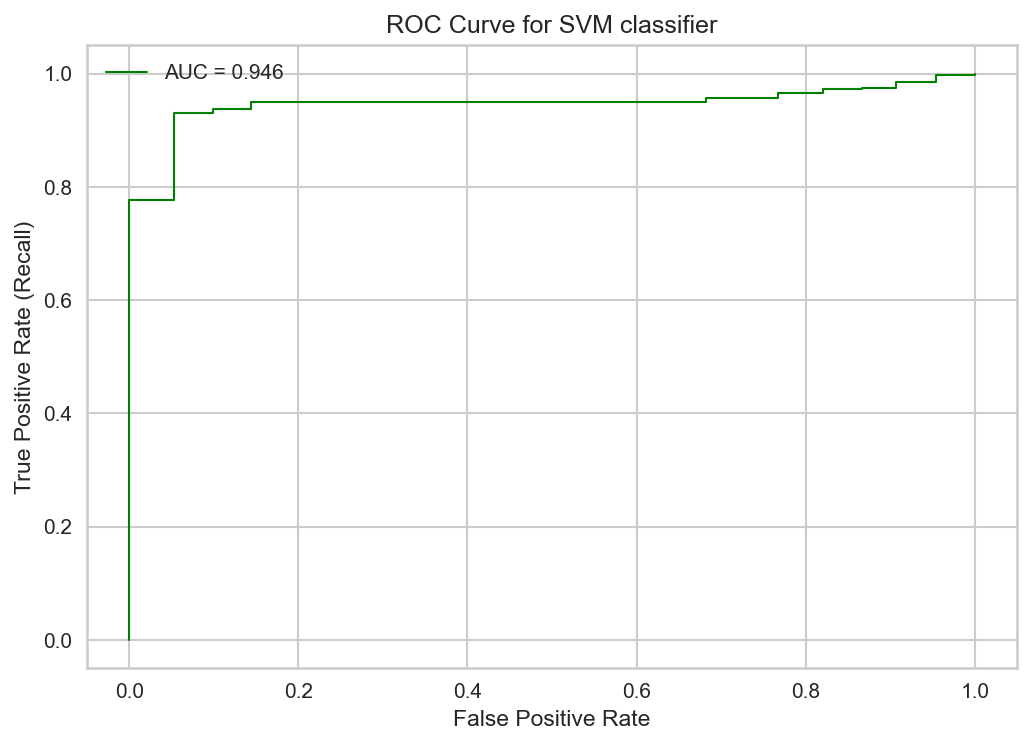

In [308]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for SVM classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


In [236]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from yellowbrick.model_selection import learning_curve

svm = SVC(C=1, kernel='linear', gamma='scale',probability=True)
#print(learning_curve(svm, X, y, cv=10, scoring='accuracy'))


In [237]:
svm.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [238]:
svm.score(X_train,y_train)

0.8761089987325729

In [239]:
svm.score(X_test,y_test)

0.8683544303797468

In [240]:
y_preds = svm.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       395
         1.0       0.83      0.93      0.88       395

    accuracy                           0.87       790
   macro avg       0.87      0.87      0.87       790
weighted avg       0.87      0.87      0.87       790



In [241]:
# get the probability distribution
probas = svm.predict_proba(X_test)
# # plot
# plt.figure(dpi=150)
# plt.hist(probas, bins=20)
# plt.title('Classification Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('# of Instances')
# plt.xlim([0.5, 1.0])
# # plt.legend(target_names)
# plt.show()

# SVM ROC for Isoprenaline

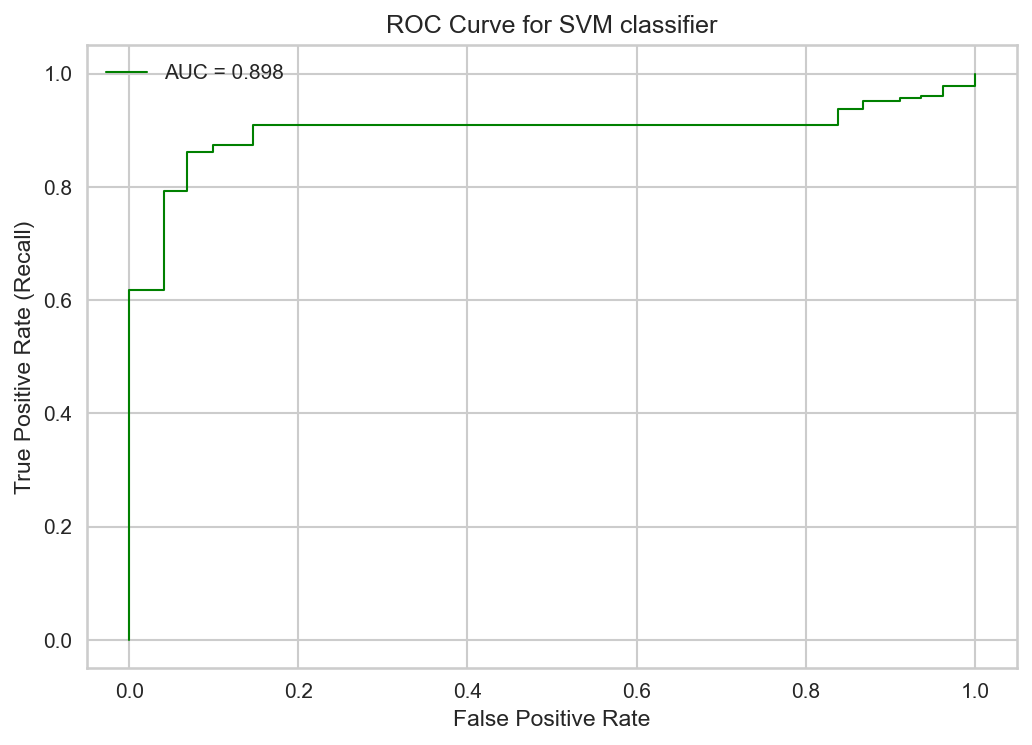

In [242]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for SVM classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


In [ ]:
# #Predict on test set
# predictions_NN_prob = clf.predict(X_test)
# predictions_NN_prob = predictions_NN_prob[:,0]

# # predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0)

In [ ]:
# #Print accuracy
# acc_NN = accuracy_score(y_test, predictions_NN_01)
# print('Overall accuracy of Neural Network model:', acc_NN)

In [ ]:
# false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
# roc_auc = auc(false_positive_rate, recall)
# plt.figure()
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.ylabel('Recall')
# plt.xlabel('Fall-out (1-Specificity)')
# plt.show()

In [ ]:
# cm = confusion_matrix(y_test, predictions_NN_01)
# labels = ['No Default', 'Default']
# plt.figure(figsize=(8,6))
# sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix')
# plt.ylabel('True Class')
# plt.xlabel('Predicted Class')
# plt.show()

# Digoxin

In [60]:
# df2=df3[s]
# df=pd.concat([df1,df2],axis=1)
# cols_to_scale = [df.columns]

# scaler = MinMaxScaler()
# scaled_df= scaler.fit_transform(df)
# df = pd.DataFrame(scaled_df,columns = df.columns)

In [61]:
# def ANN3(X_train, y_train, X_test, y_test, loss, weights):
#     model = keras.Sequential([
#         keras.layers.Dense(65,input_dim=65, activation='relu'),
#         #keras.layers.Dense(25, input_dim=51, activation='relu'),
#         keras.layers.Dropout(0.2),
#         keras.layers.Dense(15, activation='relu'),
#         keras.layers.Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
    
#     if weights == -1:
#         model.fit(X_train, y_train, epochs=50)
#     else:
#         model.fit(X_train, y_train, epochs=50, class_weight = weights)
    
#     print(model.evaluate(X_test, y_test))
    
#     y_preds = model.predict(X_test)
#     y_preds = np.round(y_preds)
    
#     print("Classification Report: \n", classification_report(y_test, y_preds))
    
#     return y_preds

In [62]:
# X = df.drop(s,axis='columns')
# y = df[s]

In [63]:
# pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X)
# PCA_df = pd.DataFrame(data = X_pca)
# PCA_df = pd.concat([PCA_df, df[s]], axis = 1)
# PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Digoxin tablet
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,1.0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,1.0
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,0.0
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,1.0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,1.0


In [64]:
# count_class_0, count_class_1 = PCA_df[s].value_counts()[0], PCA_df[s].value_counts()[1]
# # Divide by class
# df_class_0 = PCA_df[PCA_df[s] == 0]
# df_class_1 = PCA_df[PCA_df[s] == 1]

In [65]:
# PCA_df[s].value_counts(ascending =True)

1.0     997
0.0    1006
Name: Digoxin tablet, dtype: int64

In [66]:
# # Oversample 1-class and concat the DataFrames of both classes( if count of 0 greater than count of 1)
# # Oversample 0-class and concat the DataFrames of both classes( if count of 0 lesser than count of 1)
# if count_class_0>count_class_1:
#     df_class_1_over = df_class_1.sample(count_class_0, replace=True)
#     df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#     print('Random over-sampling:')
#     print(df_test_over[s].value_counts())
# else:
#     df_class_0_over = df_class_0.sample(count_class_1,replace=True)
#     df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

#     print('Random over-sampling:')
#     print(df_test_over[s].value_counts())

Random over-sampling:
0.0    1006
1.0    1006
Name: Digoxin tablet, dtype: int64


In [67]:
# X = df_test_over.drop(s,axis='columns')
# y = df_test_over[s]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [68]:
# y_train.value_counts()

0.0    704
1.0    704
Name: Digoxin tablet, dtype: int64

In [69]:
# >>> from sklearn.ensemble import RandomForestClassifier
# >>> from sklearn.datasets import make_classification


In [70]:
# >>> clf = RandomForestClassifier(max_depth=5, random_state=0)
# >>> clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [71]:
# clf.score(X_train,y_train)

0.8913352272727273

In [72]:
# clf.score(X_test,y_test)

0.7003311258278145

In [73]:
# y_preds = clf.predict(X_test)
# y_preds = np.round(y_preds)

# print("Classification Report: \n", classification_report(y_test, y_preds))


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       302
         1.0       0.71      0.67      0.69       302

    accuracy                           0.70       604
   macro avg       0.70      0.70      0.70       604
weighted avg       0.70      0.70      0.70       604

